# Eficiencia de la ejecución presupuestaria

Febrero 2020

En este notebook se hace un análisis de la eficiencia de la ejecución presupuestaria a nivel de rubros y cuentas para las instituciones del gobierno central.

## Preparación

In [18]:
import sqlite3
import pandas as pd
import seaborn as sns

DB = '../../prep/accrued/accrued.db'

In [4]:
conn = sqlite3.connect(DB)

In [15]:
stmt = """
SELECT 
    year, office, SUBSTR(object, 0, 3)  AS object, 
    SUM(approved) AS approved, 
    SUM(modified) AS modified, 
    SUM(accrued) AS accrued
FROM accrued
GROUP BY year, office, SUBSTR(object, 0, 3)
"""
data = pd.read_sql(stmt, conn)
data = data[data.office.apply(lambda s: s[-2:] == '00')]
data.head()

,year,office,object,approved,modified,accrued
0,2007,100,51,16932090.0,17038301.99,16935366.30
1,2007,100,54,6916665.0,6132590.48,5185064.87
2,2007,100,55,2080000.0,2244055.44,2235710.45
3,2007,100,56,127000.0,230598.93,229521.02
4,2007,100,61,2387785.0,3222764.59,2115118.50


In [16]:
data['eff_apr'] = data.accrued / data.approved
data['eff_mod'] = data.accrued / data.modified
data.head()

,year,office,object,approved,modified,accrued,eff_apr,eff_mod
0,2007,100,51,16932090.0,17038301.99,16935366.30,1.000193,0.993959
1,2007,100,54,6916665.0,6132590.48,5185064.87,0.749648,0.845493
2,2007,100,55,2080000.0,2244055.44,2235710.45,1.074861,0.996281
3,2007,100,56,127000.0,230598.93,229521.02,1.807252,0.995326
4,2007,100,61,2387785.0,3222764.59,2115118.50,0.885808,0.656306


## By year

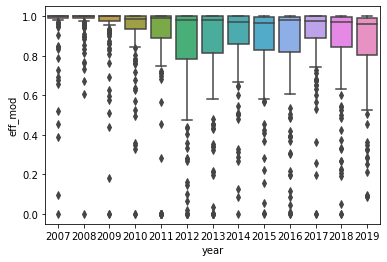

In [19]:
sns.boxplot(x='year', y='eff_mod', data=data)

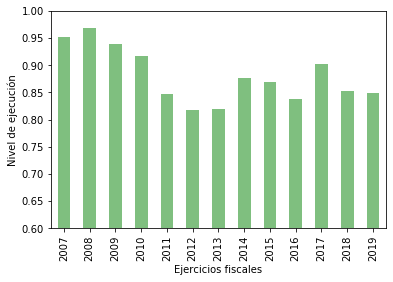

In [111]:
by_year = data.groupby(['year'])['eff_mod'].mean()
ax = by_year.plot(kind='bar', color='green', alpha=0.5)
ax.set_ylim([0.6, 1.0])
ax.set_xlabel('Ejercicios fiscales')
ax.set_ylabel('Nivel de ejecución')
ax.figure.savefig('by_year.png')

## By budgetary code

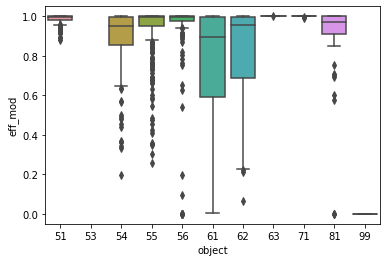

In [30]:
sns.boxplot(x='object', y='eff_mod', data=data)

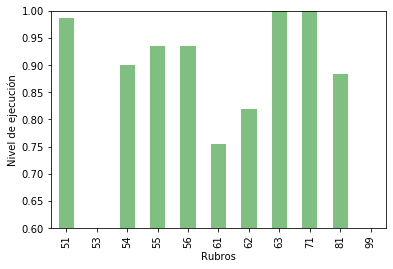

In [112]:
by_object = data.groupby('object')['eff_mod'].mean()
ax = by_object.plot(kind='bar', color='green', alpha=0.5)
ax.set_ylim([0.6, 1.0])
ax.set_ylabel('Nivel de ejecución')
ax.set_xlabel('Rubros')
ax.figure.savefig('by_object.png')

## By office

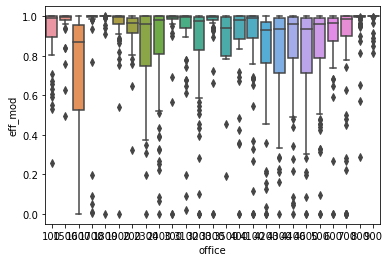

In [33]:
sns.boxplot(x='office', y='eff_mod', data=data)

In [93]:
by_office = data.groupby('office')['eff_mod'].mean().sort_values(ascending=False)
by_office

office
900     0.988820
1800    0.980868
800     0.968640
1500    0.966175
300     0.949445
3300    0.948964
1900    0.946606
200     0.931881
3100    0.922005
1700    0.914296
100     0.911152
4100    0.885594
600     0.874746
400     0.873712
700     0.853284
3200    0.849416
2300    0.842988
500     0.835351
2400    0.834940
4400    0.830654
4300    0.822264
3500    0.814506
4600    0.808486
4200    0.802579
1600    0.688251
Name: eff_mod, dtype: float64

In [94]:
offices = pd.read_sql('SELECT * FROM office', conn)
offices = offices.drop_duplicates('office')
offices['office_name'] = offices.office_name.apply(lambda s: s.strip())
offices.head()

,office,office_name,level
0,100,Organo Legislativo,1
1,200,Corte de Cuentas de la República,1
2,300,Tribunal Supremo Electoral,1
3,400,Tribunal de Servicio Civil,1
4,500,Presidencia de la República,1


In [95]:
by_office = by_office.reset_index().merge(offices, on='office', how='left')

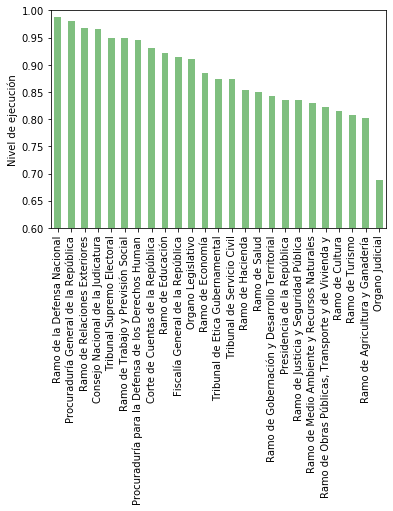

In [110]:
ax = by_office.eff_mod.plot(kind='bar', color='green', alpha=0.5)
ax.set_xticklabels(by_office.office_name, rotation=90)
ax.set_ylim([0.6, 1.0])
ax.set_ylabel('Nivel de ejecución')
ax.figure.savefig('by_office.png')